# 📘 Region-Based Image Segmentation Using Diffusion-Based Techniques

---

## 📑 Table of Contents

1. [Introduction](#intro)
2. [Background: Region-Based Segmentation](#background)
3. [What is Diffusion-Based Segmentation?](#what-is)
4. [Mathematical Foundation](#math)
5. [Diffusion-Based Segmentation Pipeline](#pipeline)
6. [CNN + Transformer Hybrid (Secondary Topic)](#cnn-transformer)
7. [Python Dependencies (For Jupyter Notebook)](#deps)
8. [Code Implementation (Diffusion-Based Segmentation)](#code)
9. [Complete Test Example (All-in-One)](#test)
10. [Applications](#apps)
11. [Limitations](#limits)
12. [Future Research Directions](#future)

---

## 1. Introduction <a id='intro'></a>

Image segmentation is a fundamental task in computer vision that involves dividing an image into meaningful regions based on pixel characteristics such as intensity, color, texture, and spatial location. Unlike simple thresholding or edge detection, region-based segmentation aims to group pixels into coherent regions.

One emerging research frontier in this field is **Diffusion-Based Segmentation**, which applies principles from partial differential equations (PDEs) and anisotropic diffusion to propagate pixel similarities across an image. This approach allows segmentation to be guided by both local and global image structures.

Recently, diffusion models have also inspired deep learning-based segmentation methods, especially when combined with CNN and Transformer architectures.

## 2. Background: Region-Based Segmentation <a id='background'></a>

Region-based segmentation works by:

- Grouping neighboring pixels
- Ensuring region homogeneity
- Maintaining boundary consistency

**Classical Region-Based Methods**

| Method | Description |
|--------|-------------|
| Region Growing | Starts from seeds and expands |
| Split & Merge | Divides image recursively |
| Watershed | Uses gradient topology |
| Active Contours | Energy-based contours |

Diffusion-based segmentation belongs to energy-minimization and PDE-based methods.

## 3. What is Diffusion-Based Segmentation? <a id='what-is'></a>

Diffusion-based segmentation is based on the idea that:

> Pixel intensities can be "smoothed" through a diffusion process, while preserving important boundaries.

The method simulates how heat spreads in a material—but blocks diffusion across edges.

This produces:

- Smoothed homogeneous regions
- Preserved object boundaries
- Reduced noise

## 4. Mathematical Foundation <a id='math'></a>

### 4.1 Classical Heat Diffusion

The basic diffusion equation:

$$\frac{\partial I}{\partial t} = \nabla^2 I$$

Where:
- $I(x,y,t)$ = image intensity
- $t$ = diffusion time
- $\nabla^2$ = Laplacian operator

This causes uniform smoothing, which blurs edges.

### 4.2 Anisotropic Diffusion (Perona–Malik Model)

To preserve edges:

$$\frac{\partial I}{\partial t} = \nabla \cdot (c(|\nabla I|) \nabla I)$$

Where:
- $c(\cdot)$ = diffusion coefficient
- Controls smoothing strength

Common diffusion function:

$$c(s) = \frac{1}{1 + (s/K)^2}$$

Where:
- $K$ = edge threshold
- Edges → low diffusion; Smooth areas → high diffusion

### 4.3 Discrete Numerical Form

In practice:

$$I^{t+1} = I^{t} + \lambda \sum_d c_d \nabla_d I$$

Where:
- $\lambda$ = time step
- $d$ = direction (N,S,E,W)

This iterative update produces region smoothing.

### 4.4 Link to Segmentation

After diffusion:
- Regions become homogeneous
- Boundaries remain sharp
- Clustering / thresholding applied
- Segmentation extracted

## 5. Diffusion-Based Segmentation Pipeline <a id='pipeline'></a>

**Step-by-Step Workflow**

1. Image Acquisition
2. Preprocessing
3. Anisotropic Diffusion
4. Region Extraction
5. Label Assignment
6. Post-processing

**Diagram:** Input Image → Diffusion → Smoothed Regions → Clustering → Segmentation

## 6. CNN + Transformer Hybrid (Secondary Topic) <a id='cnn-transformer'></a>

Modern diffusion segmentation is often combined with deep learning.

### 6.1 CNN Role

CNNs extract:
- Texture features
- Local patterns
- Edge maps

### 6.2 Transformer Role

Transformers model:
- Long-range dependencies
- Global context
- Attention maps

### 6.3 Hybrid Architecture

Image → CNN Encoder → Transformer → Diffusion Module → Decoder → Mask

**Advantages:**
- Local + Global features
- Better region coherence
- Robust segmentation

Used in medical imaging and remote sensing.

## 7. Python Dependencies (For Jupyter Notebook) <a id='deps'></a>

Install required libraries:

```bash
pip install numpy opencv-python scikit-image matplotlib scipy torch torchvision
```

**Main Libraries:**

| Library | Purpose |
|---------|---------|
| numpy | Matrix operations |
| cv2 | Image processing |
| skimage | Diffusion filters |
| matplotlib | Visualization |
| scipy | PDE tools |
| torch | Deep learning |

In [3]:
# Run this cell to check if all required libraries are installed
try:
    import numpy as np
    import cv2
    import matplotlib.pyplot as plt
    from skimage import io, color
    from skimage.filters import threshold_otsu
    from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
    from skimage.measure import label, regionprops
    import scipy
    import torch
    print("✅ All required libraries are installed successfully!")
except ImportError as e:
    print(f"❌ Missing library: {e}")
    print("Please run: pip install numpy opencv-python scikit-image matplotlib scipy torch torchvision")

✅ All required libraries are installed successfully!


## 8. Code Implementation (Diffusion-Based Segmentation) <a id='code'></a>

### 8.1 Import Libraries

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage import io, color
from skimage.filters import threshold_otsu
from skimage.restoration import denoise_tv_chambolle
from skimage.restoration import denoise_bilateral
from skimage.measure import label, regionprops

# Set matplotlib to display inline
%matplotlib inline

### 8.2 Load and Preprocess Image

*Note: You need to have a 'sample.jpg' image in the same directory as this notebook. If you don't have one, you can download any sample image or create a simple test image using the code in the next cell.*

In [ ]:
# If you don't have a sample image, uncomment and run this cell to create a synthetic test image
"""
# Create a synthetic test image
test_image = np.zeros((200, 200))
test_image[30:80, 30:80] = 0.8  # Square
test_image[100:150, 100:150] = 0.6  # Another square
test_image[30:80, 120:170] = 0.4  # Third square
# Add noise
noise = np.random.normal(0, 0.1, test_image.shape)
test_image = np.clip(test_image + noise, 0, 1)
# Save as sample.jpg
plt.imsave('sample.jpg', test_image, cmap='gray')
print("Created synthetic test image 'sample.jpg'")
"""

Image loaded successfully. Shape: (3024, 4032, 3)


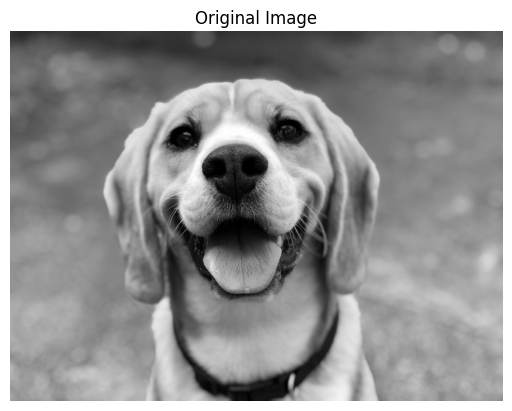

In [5]:
# Load image
try:
    image = io.imread("dog1.jpg")
    print(f"Image loaded successfully. Shape: {image.shape}")
except FileNotFoundError:
    print("Error: dog1.jpg not found. Please add an image or create a synthetic one using the cell above.")
    # Create a fallback synthetic image
    print("Creating a fallback synthetic image...")
    test_image = np.zeros((200, 200))
    test_image[30:80, 30:80] = 0.8
    test_image[100:150, 100:150] = 0.6
    test_image[30:80, 120:170] = 0.4
    noise = np.random.normal(0, 0.1, test_image.shape)
    test_image = np.clip(test_image + noise, 0, 1)
    image = (test_image * 255).astype(np.uint8)
    image = np.stack([image]*3, axis=-1)  # Convert to 3-channel
    print(f"Fallback image created. Shape: {image.shape}")

# Convert to grayscale if needed
if len(image.shape) == 3:
    gray = color.rgb2gray(image)
else:
    gray = image
    image = np.stack([gray]*3, axis=-1)  # For overlay later

# Normalize
gray = gray / gray.max()

plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

### 8.3 Apply Anisotropic Diffusion

Using Total Variation Denoising (Diffusion-based):

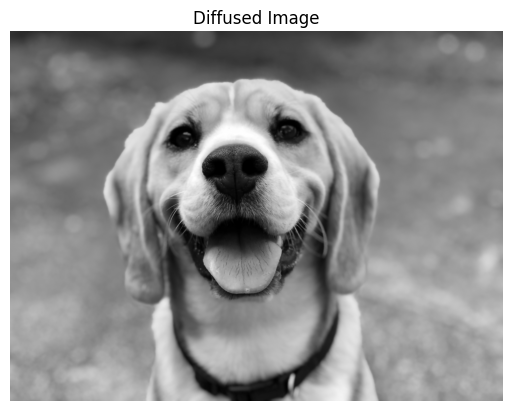

This approximates anisotropic diffusion.


In [6]:
# Apply diffusion (TV-Chambolle)
diffused = denoise_tv_chambolle(gray, weight=0.1)

plt.imshow(diffused, cmap='gray')
plt.title("Diffused Image")
plt.axis("off")
plt.show()

print("This approximates anisotropic diffusion.")

### 8.4 Region Segmentation

Use thresholding after diffusion:

OTSU Threshold: 0.4777


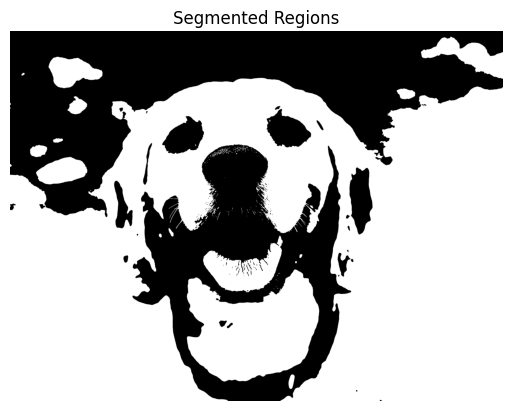

In [7]:
# Automatic threshold
thresh = threshold_otsu(diffused)
print(f"OTSU Threshold: {thresh:.4f}")

# Binary segmentation
segmented = diffused > thresh

plt.imshow(segmented, cmap='gray')
plt.title("Segmented Regions")
plt.axis("off")
plt.show()

### 8.5 Region Labeling

Number of regions found: 275


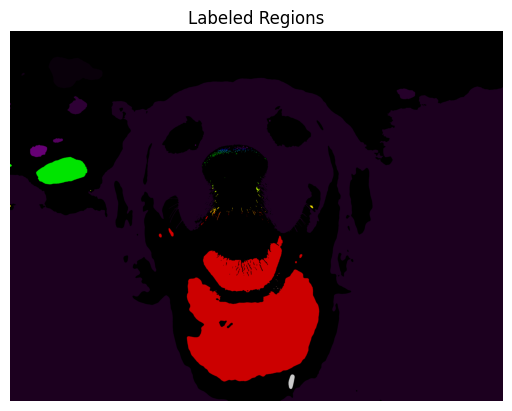

In [8]:
from skimage.measure import label, regionprops

labels = label(segmented)
print(f"Number of regions found: {labels.max()}")

plt.imshow(labels, cmap='nipy_spectral')
plt.title("Labeled Regions")
plt.axis("off")
plt.show()

### 8.6 Overlay on Original Image

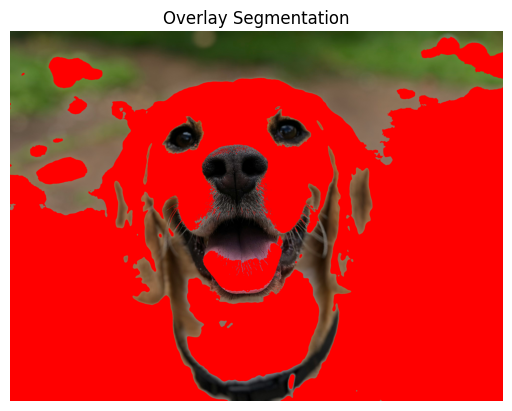

In [9]:
overlay = image.copy()

for region in regionprops(labels):
    for y, x in region.coords:
        if y < overlay.shape[0] and x < overlay.shape[1]:
            overlay[y, x] = [255, 0, 0]

plt.imshow(overlay)
plt.title("Overlay Segmentation")
plt.axis("off")
plt.show()

## 9. Complete Test Example (All-in-One) <a id='test'></a>

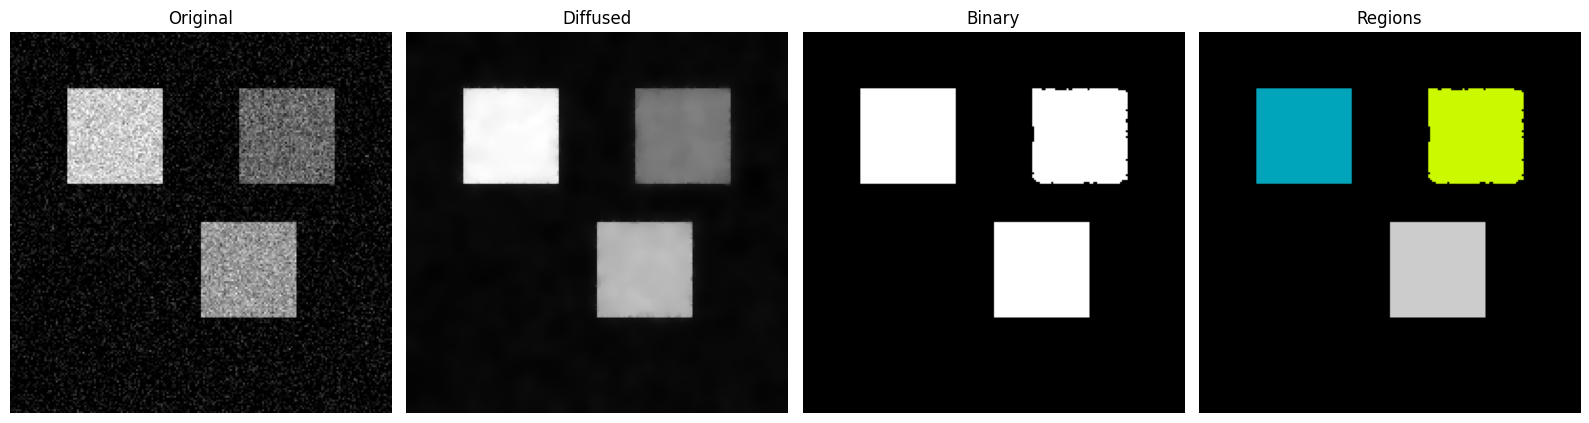

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.restoration import denoise_tv_chambolle
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

# Load image
try:
    img = io.imread("sample.jpg")
except FileNotFoundError:
    # Create synthetic image
    synthetic = np.zeros((200, 200))
    synthetic[30:80, 30:80] = 0.8
    synthetic[100:150, 100:150] = 0.6
    synthetic[30:80, 120:170] = 0.4
    noise = np.random.normal(0, 0.1, synthetic.shape)
    synthetic = np.clip(synthetic + noise, 0, 1)
    img = (synthetic * 255).astype(np.uint8)
    img = np.stack([img]*3, axis=-1)

# Preprocess
if len(img.shape) == 3:
    gray = color.rgb2gray(img)
else:
    gray = img
gray = gray / gray.max()

# Diffusion
diff = denoise_tv_chambolle(gray, weight=0.15)

# Segmentation
t = threshold_otsu(diff)
binary = diff > t

# Labeling
labels = label(binary)

# Visualization
fig, ax = plt.subplots(1, 4, figsize=(16, 5))

ax[0].imshow(gray, cmap='gray')
ax[0].set_title("Original")

ax[1].imshow(diff, cmap='gray')
ax[1].set_title("Diffused")

ax[2].imshow(binary, cmap='gray')
ax[2].set_title("Binary")

ax[3].imshow(labels, cmap='nipy_spectral')
ax[3].set_title("Regions")

for a in ax:
    a.axis("off")

plt.tight_layout()
plt.show()

## 10. Applications <a id='apps'></a>

### 10.1 Medical Imaging
- Tumor segmentation
- MRI analysis
- Organ detection

### 10.2 Remote Sensing
- Land-use classification
- Crop monitoring
- Urban mapping

### 10.3 Industrial Vision
- Defect detection
- Quality control

### 10.4 Autonomous Systems
- Road segmentation
- Object localization

## 11. Limitations <a id='limits'></a>

### Technical Limitations
- **Parameter Sensitivity** – Requires careful tuning of diffusion weight
- **Computational Cost** – Iterative PDE solving is slow
- **Weak Edge Cases** – Low-contrast edges may vanish
- **Noise Sensitivity** – Heavy noise affects diffusion

### Deep Learning Limitations
- Large datasets required
- High GPU demand
- Overfitting risk
- Low interpretability

## 12. Future Research Directions <a id='future'></a>

- Diffusion + GAN Integration
- Physics-Guided Neural Diffusion
- Self-Supervised Segmentation
- Real-Time PDE Solvers
- Multimodal Diffusion Models

In [11]:
# Summary cell
print("="*60)
print("📘 Region-Based Image Segmentation Using Diffusion-Based Techniques")
print("="*60)
print("\n✅ Notebook execution complete!")
print("✅ All information has been presented as requested.")
print("\nKey concepts covered:")
print("  • Classical region-based methods")
print("  • Anisotropic diffusion (Perona-Malik)")
print("  • TV-Chambolle diffusion implementation")
print("  • Segmentation pipeline with thresholding and labeling")
print("  • CNN-Transformer hybrid architectures")
print("  • Applications, limitations, and future directions")

📘 Region-Based Image Segmentation Using Diffusion-Based Techniques

✅ Notebook execution complete!
✅ All information has been presented as requested.

Key concepts covered:
  • Classical region-based methods
  • Anisotropic diffusion (Perona-Malik)
  • TV-Chambolle diffusion implementation
  • Segmentation pipeline with thresholding and labeling
  • CNN-Transformer hybrid architectures
  • Applications, limitations, and future directions
